In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math

In [2]:
df = pd.read_csv("N-50/TCS.csv")
# Read a CSV file named "TCS.csv" located in the "N-50" directory and store its data in a DataFrame named 'df'.


In [3]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.70,1198.70,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.00,997.00,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.40,982.40,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.90,990.00,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.50,990.00,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4134,2021-04-26,TCS,EQ,3109.50,3102.05,3153.00,3088.05,3100.05,3100.80,3122.35,2490260,7.775465e+14,87012.0,1345353,0.5402
4135,2021-04-27,TCS,EQ,3100.80,3106.00,3136.10,3103.00,3132.75,3132.00,3122.18,1471417,4.594036e+14,97077.0,849767,0.5775
4136,2021-04-28,TCS,EQ,3132.00,3149.95,3151.00,3112.00,3123.00,3124.10,3125.72,1639037,5.123176e+14,76017.0,847762,0.5172
4137,2021-04-29,TCS,EQ,3124.10,3145.60,3157.35,3105.50,3114.45,3115.25,3130.83,1621395,5.076306e+14,98275.0,837567,0.5166


In [4]:
# Convert the 'Date' column in the DataFrame 'df' to a datetime data type.
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column 'day_of_the_week' in the DataFrame 'df' and fill it with the name of the day for each date.
df['day_of_the_week'] = df['Date'].dt.day_name()

# Calculate the 'price_change_in_day' by subtracting the 'Open' price from the 'Close' price for each row.
df['price_change_in_day'] = df['Close'] - df['Open']

# Compute the percentage change from the immediately previous row in the 'Close' column and store it in 'price_change_by_day'.
df['price_change_by_day'] = df['Close'].pct_change() # Computes the percentage change from the immediately previous row by default

# Calculate the rolling mean of the 'price_change_by_day' with a window of 5 days, including the current day.
# This will give the weekly average change in prices.
df['Weekly_change'] =  df.price_change_by_day.rolling(window=5,min_periods=0).mean() 

# Drop the first row of the DataFrame since the 'pct_change()' operation introduces a NaN value in the first row.
df = df[1:]

In [5]:
# Filter the DataFrame 'df' to select rows where the 'day_of_the_week' column contains either 'Saturday' or 'Sunday'.
weekend_rows = df[df['day_of_the_week'].isin(['Saturday', 'Sunday'])]

In [6]:
# Check if the 'weekend_rows' DataFrame is not empty, indicating the presence of Saturday or Sunday entries in the data.
if not weekend_rows.empty:
    print("There are Saturday and/or Sunday entries in the data.")
else:
    print("There are no Saturday or Sunday entries in the data.")

There are Saturday and/or Sunday entries in the data.


In [7]:
# Create a new DataFrame 'filtered_df' by excluding rows where the 'day_of_the_week' is either 'Saturday' or 'Sunday'.
filtered_df = df[~df['day_of_the_week'].isin(['Saturday', 'Sunday'])]
# The 'filtered_df' DataFrame now contains only the rows corresponding to weekdays, excluding weekends.

In [8]:
filtered_df.to_csv('filtered_data.csv', index=False)
# This code saves the filtered data to a CSV file for further use or analysis.

In [9]:
filtered_df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,day_of_the_week,price_change_in_day,price_change_by_day,Weekly_change
1,2004-08-26,TCS,EQ,987.95,992.00,997.00,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561,Thursday,-13.00,-0.009059,-0.009059
2,2004-08-27,TCS,EQ,979.00,982.40,982.40,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549,Friday,-19.75,-0.016701,-0.012880
3,2004-08-30,TCS,EQ,962.65,969.90,990.00,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294,Monday,16.85,0.025035,-0.000242
4,2004-08-31,TCS,EQ,986.75,986.50,990.00,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624,Tuesday,1.60,0.001368,0.000161
5,2004-09-01,TCS,EQ,988.10,990.00,995.00,983.60,986.00,987.90,989.68,2491943,2.466236e+14,NaN,790586,0.3173,Wednesday,-2.10,-0.000202,0.000088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4134,2021-04-26,TCS,EQ,3109.50,3102.05,3153.00,3088.05,3100.05,3100.80,3122.35,2490260,7.775465e+14,87012.0,1345353,0.5402,Monday,-1.25,-0.002798,-0.005972
4135,2021-04-27,TCS,EQ,3100.80,3106.00,3136.10,3103.00,3132.75,3132.00,3122.18,1471417,4.594036e+14,97077.0,849767,0.5775,Tuesday,26.00,0.010062,-0.001872
4136,2021-04-28,TCS,EQ,3132.00,3149.95,3151.00,3112.00,3123.00,3124.10,3125.72,1639037,5.123176e+14,76017.0,847762,0.5172,Wednesday,-25.85,-0.002522,-0.001286
4137,2021-04-29,TCS,EQ,3124.10,3145.60,3157.35,3105.50,3114.45,3115.25,3130.83,1621395,5.076306e+14,98275.0,837567,0.5166,Thursday,-30.35,-0.002833,-0.000215


In [10]:
filtered_df.shape

(4118, 19)

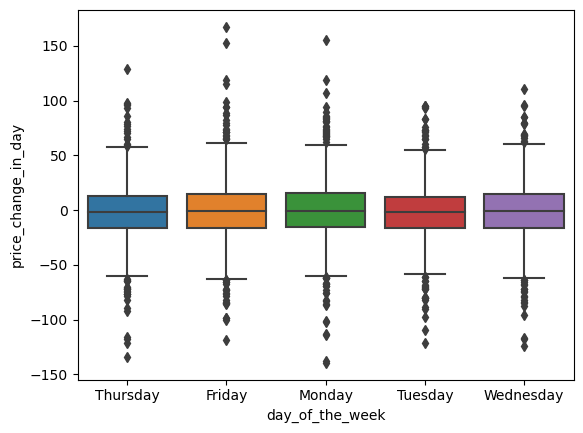

In [11]:
ax = sns.boxplot(x="day_of_the_week", y="price_change_in_day", data=filtered_df)

In [12]:
# from the above Box-Plot:
# Wednesday has the more probability of the graph to be green.

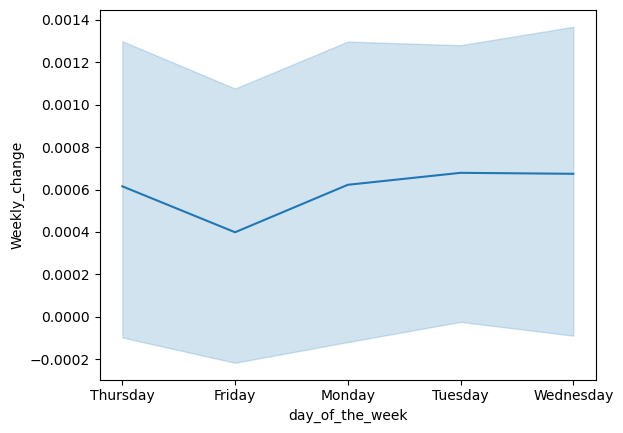

In [13]:
ax = sns.lineplot(x='day_of_the_week', y='Weekly_change', data=filtered_df, markers=True)
# This code generates a line plot to visualize the weekly changes in data based on the day of the week.

In [14]:
# From the above line plot:
# when the stock ended on friday of the week and it started inceasing gradually from monday to wednesday.
# After the fall of stock on friday it start raising when the stock opens on monday.
# And later the stock falls till friday.

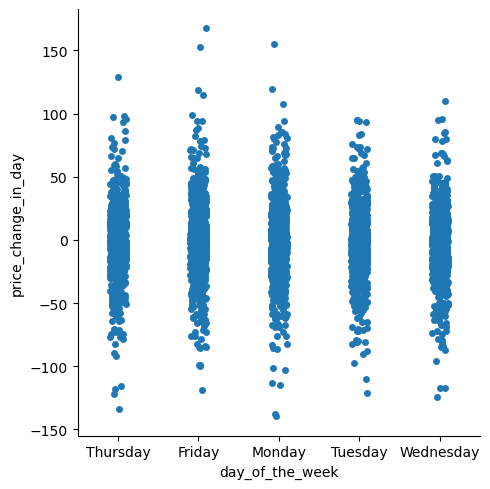

In [15]:
sns.catplot(x="day_of_the_week", y="price_change_in_day", data=filtered_df)
# This code generates a categorical plot to visualize the distribution of 'price_change_in_day' across different days of the week.

In [16]:
# This catplot is Simular to as box plot

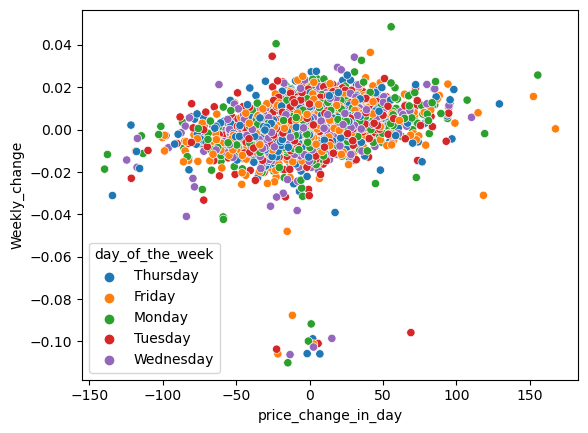

In [17]:
sns.scatterplot(x='price_change_in_day',y='Weekly_change',hue='day_of_the_week',data=filtered_df)
plt.show()
# This code generates a scatter plot that shows the relationship between daily price change and weekly price change,
# with data points colored by the day of the week.

In [18]:
# The above is a scatter plot of the price change in a day to weekly change of the price.

## Movement_type of Intra day in a day.

In [19]:
filtered_df['price_diff'] = filtered_df['Close'] - filtered_df['Open']
# This code computes and adds a new column, 'price_diff', to the 'filtered_df' DataFrame, representing the price difference for each data point.

C:\Users\ADITHYA NAIDU\AppData\Local\Temp\ipykernel_12848\3199248132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['price_diff'] = filtered_df['Close'] - filtered_df['Open']


In [20]:
# This gives the movement_type of the INTRA DAY of a paticular day.
# Define a function 'analyze_movement' that analyzes the movement type of an intra-day price change for a specific day.
def analyze_movement(row):
    if row['price_diff'] > 0:
        if row['High'] > row['Open'] and row['Low'] < row['Close']:
            return '1st gain and then loss'
        return 'gain'
    elif row['price_diff'] < 0:
        if row['High'] > row['Close'] and row['Low'] < row['Open']:
            return '1st loss and then gain'
        return 'loss'
    return 'no change'

# Apply the 'analyze_movement' function to each row in the 'filtered_df' DataFrame and create a new column 'movement_type'.
filtered_df['movement_type'] = filtered_df.apply(analyze_movement, axis=1)
# This code calculates and adds a new column 'movement_type' to 'filtered_df' to classify the intra-day price movement type for each data point.

C:\Users\ADITHYA NAIDU\AppData\Local\Temp\ipykernel_12848\3086326729.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['movement_type'] = filtered_df.apply(analyze_movement, axis=1)


In [21]:
filtered_df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Turnover,Trades,Deliverable Volume,%Deliverble,day_of_the_week,price_change_in_day,price_change_by_day,Weekly_change,price_diff,movement_type
1,2004-08-26,TCS,EQ,987.95,992.00,997.00,975.30,976.85,979.00,985.65,...,4.982865e+14,NaN,1294899,0.2561,Thursday,-13.00,-0.009059,-0.009059,-13.00,1st loss and then gain
2,2004-08-27,TCS,EQ,979.00,982.40,982.40,958.55,961.20,962.65,969.94,...,3.715586e+14,NaN,976527,0.2549,Friday,-19.75,-0.016701,-0.012880,-19.75,1st loss and then gain
3,2004-08-30,TCS,EQ,962.65,969.90,990.00,965.00,986.40,986.75,982.65,...,3.005106e+14,NaN,701664,0.2294,Monday,16.85,0.025035,-0.000242,16.85,1st gain and then loss
4,2004-08-31,TCS,EQ,986.75,986.50,990.00,976.00,987.80,988.10,982.18,...,2.602133e+14,NaN,695234,0.2624,Tuesday,1.60,0.001368,0.000161,1.60,1st gain and then loss
5,2004-09-01,TCS,EQ,988.10,990.00,995.00,983.60,986.00,987.90,989.68,...,2.466236e+14,NaN,790586,0.3173,Wednesday,-2.10,-0.000202,0.000088,-2.10,1st loss and then gain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4134,2021-04-26,TCS,EQ,3109.50,3102.05,3153.00,3088.05,3100.05,3100.80,3122.35,...,7.775465e+14,87012.0,1345353,0.5402,Monday,-1.25,-0.002798,-0.005972,-1.25,1st loss and then gain
4135,2021-04-27,TCS,EQ,3100.80,3106.00,3136.10,3103.00,3132.75,3132.00,3122.18,...,4.594036e+14,97077.0,849767,0.5775,Tuesday,26.00,0.010062,-0.001872,26.00,1st gain and then loss
4136,2021-04-28,TCS,EQ,3132.00,3149.95,3151.00,3112.00,3123.00,3124.10,3125.72,...,5.123176e+14,76017.0,847762,0.5172,Wednesday,-25.85,-0.002522,-0.001286,-25.85,1st loss and then gain
4137,2021-04-29,TCS,EQ,3124.10,3145.60,3157.35,3105.50,3114.45,3115.25,3130.83,...,5.076306e+14,98275.0,837567,0.5166,Thursday,-30.35,-0.002833,-0.000215,-30.35,1st loss and then gain


In [22]:
# # This is to check if a paticular moment type is present in the data
# rows_with_ = filtered_df[filtered_df['movement_type'] == "loss"]

# if not rows_with_.empty:
#     print("The following rows:")
#     print(rows_with_)
# else:
#     print("not present in the 'movement_type' column.")

## First 5days and Last 5days of a month.

In [23]:
# Adding the Year And Month columns in the data.
# This code adds 'year' and 'month' columns to the DataFrame to store the year and month information for each data point.
filtered_df['year'] = filtered_df['Date'].dt.year
filtered_df['month'] = filtered_df['Date'].dt.month

C:\Users\ADITHYA NAIDU\AppData\Local\Temp\ipykernel_12848\3777474902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['Date'].dt.year
C:\Users\ADITHYA NAIDU\AppData\Local\Temp\ipykernel_12848\3777474902.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['Date'].dt.month


In [24]:
# In this step we are seperating the data into two different data as first 5days of month and last 5days of the month.

# Create a new column 'day_rank' in the 'filtered_df' DataFrame to rank the days within each year and month.
filtered_df['day_rank'] = filtered_df.groupby(['year', 'month'])['Date'].rank()

# Create a DataFrame 'first_5_days' containing data for the first 5 days of each month.
first_5_days = filtered_df[filtered_df['day_rank'] <= 5]

# Create a DataFrame 'last_5_days' containing data for the last 5 days of each month using the maximum rank value.
last_5_days = filtered_df[filtered_df['day_rank'] >= (filtered_df.groupby(['year', 'month'])['day_rank'].transform('max') - 4)]
# This code separates the data into two DataFrames: 'first_5_days' and 'last_5_days' for the respective days of the month.

C:\Users\ADITHYA NAIDU\AppData\Local\Temp\ipykernel_12848\3967384663.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['day_rank'] = filtered_df.groupby(['year', 'month'])['Date'].rank()


In [25]:
# Create new DataFrames 'first_5_days_df' and 'last_5_days_df' by converting the 'first_5_days' and 'last_5_days' DataFrames to DataFrames.
first_5_days_df = pd.DataFrame(first_5_days)
last_5_days_df = pd.DataFrame(last_5_days)
# This code converts the selected data for the first 5 days and last 5 days of each month into separate DataFrames for further analysis or use.

In [26]:
last_5_days_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,%Deliverble,day_of_the_week,price_change_in_day,price_change_by_day,Weekly_change,price_diff,movement_type,year,month,day_rank
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,...,0.2561,Thursday,-13.00,-0.009059,-0.009059,-13.00,1st loss and then gain,2004,8,1.0
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,...,0.2549,Friday,-19.75,-0.016701,-0.012880,-19.75,1st loss and then gain,2004,8,2.0
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,...,0.2294,Monday,16.85,0.025035,-0.000242,16.85,1st gain and then loss,2004,8,3.0
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,...,0.2624,Tuesday,1.60,0.001368,0.000161,1.60,1st gain and then loss,2004,8,4.0
22,2004-09-24,TCS,EQ,1030.25,1029.1,1040.0,1026.00,1027.60,1028.80,1033.94,...,0.2159,Friday,-0.30,-0.001407,0.000935,-0.30,1st loss and then gain,2004,9,18.0


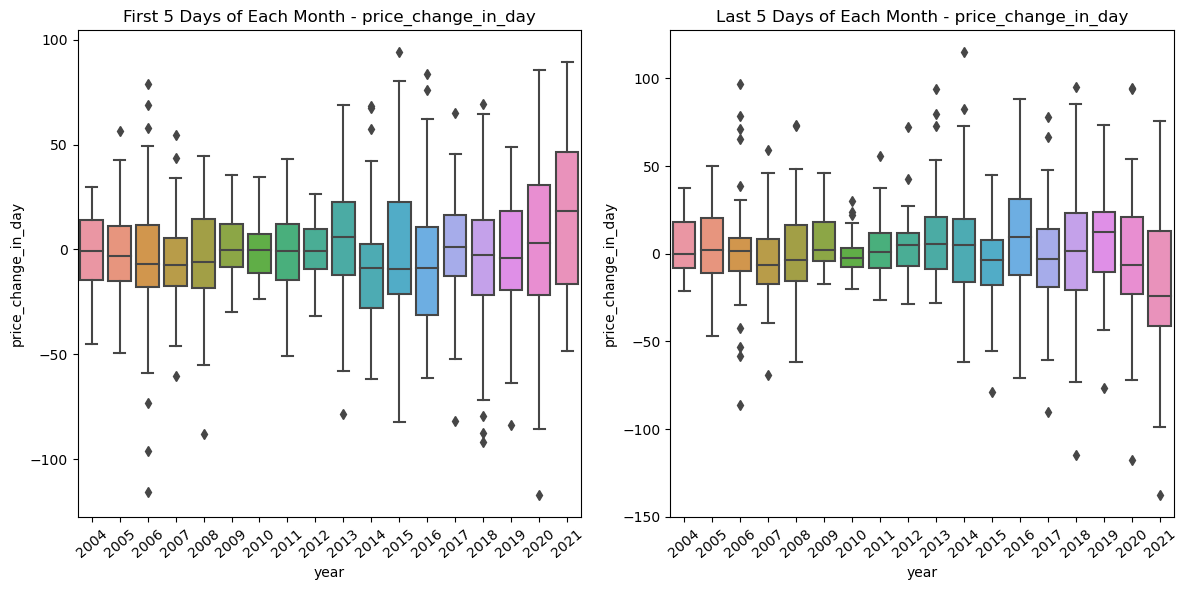

In [27]:
# Plotting

# Set the figure size for the plots.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Plot a boxplot for 'price_change_in_day' in the first 5 days of each month, grouped by 'year'.
sns.boxplot(x='year', y='price_change_in_day', data=first_5_days_df)
plt.title('First 5 Days of Each Month - price_change_in_day')
plt.xticks(rotation=40)

plt.subplot(1, 2, 2)

# Plot a boxplot for 'price_change_in_day' in the last 5 days of each month, grouped by 'year'.
sns.boxplot(x='year', y='price_change_in_day', data=last_5_days_df)
plt.title('Last 5 Days of Each Month - price_change_in_day')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

# This code creates a side-by-side comparison of boxplots to visualize the distribution of 'price_change_in_day' for the first and last 5 days of each month, grouped by year.


C:\Users\ADITHYA NAIDU\AppData\Local\Temp\ipykernel_12848\2704934535.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='price_change_in_day', data=first_5_days_df, ci=None)
C:\Users\ADITHYA NAIDU\AppData\Local\Temp\ipykernel_12848\2704934535.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='price_change_in_day', data=last_5_days_df, ci=None)


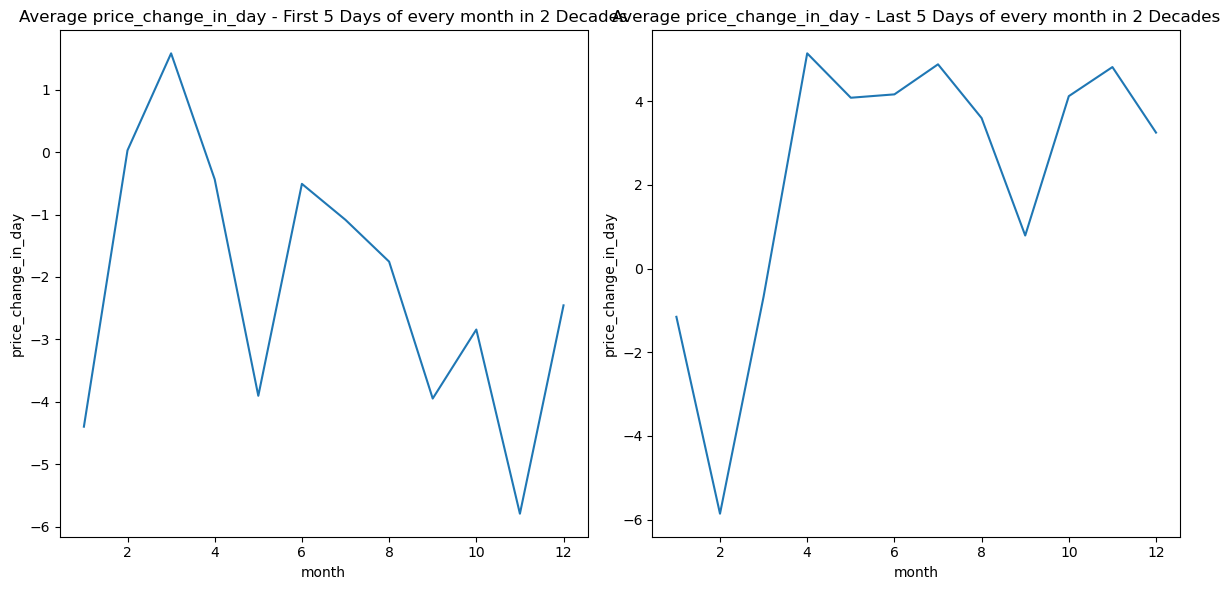

In [28]:
# Average Close Price by Month and Year:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

# Plot a line plot for the average 'price_change_in_day' in the first 5 days of each month, grouped by 'month'.
sns.lineplot(x='month', y='price_change_in_day', data=first_5_days_df, ci=None)
plt.title('Average price_change_in_day - First 5 Days of every month in 2 Decades')

plt.subplot(1, 2, 2)

# Plot a line plot for the average 'price_change_in_day' in the last 5 days of each month, grouped by 'month'.
sns.lineplot(x='month', y='price_change_in_day', data=last_5_days_df, ci=None)
plt.title('Average price_change_in_day - Last 5 Days of every month in 2 Decades')


plt.tight_layout()
plt.show()

# This code creates a side-by-side comparison of line plots to visualize the average 'price_change_in_day' for the first and last 5 days of every month over two decades.

C:\Users\ADITHYA NAIDU\AppData\Local\Temp\ipykernel_12848\29521783.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='return', data=first_5_days_df, ci=None)
C:\Users\ADITHYA NAIDU\AppData\Local\Temp\ipykernel_12848\29521783.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='return', data=last_5_days_df, ci=None)


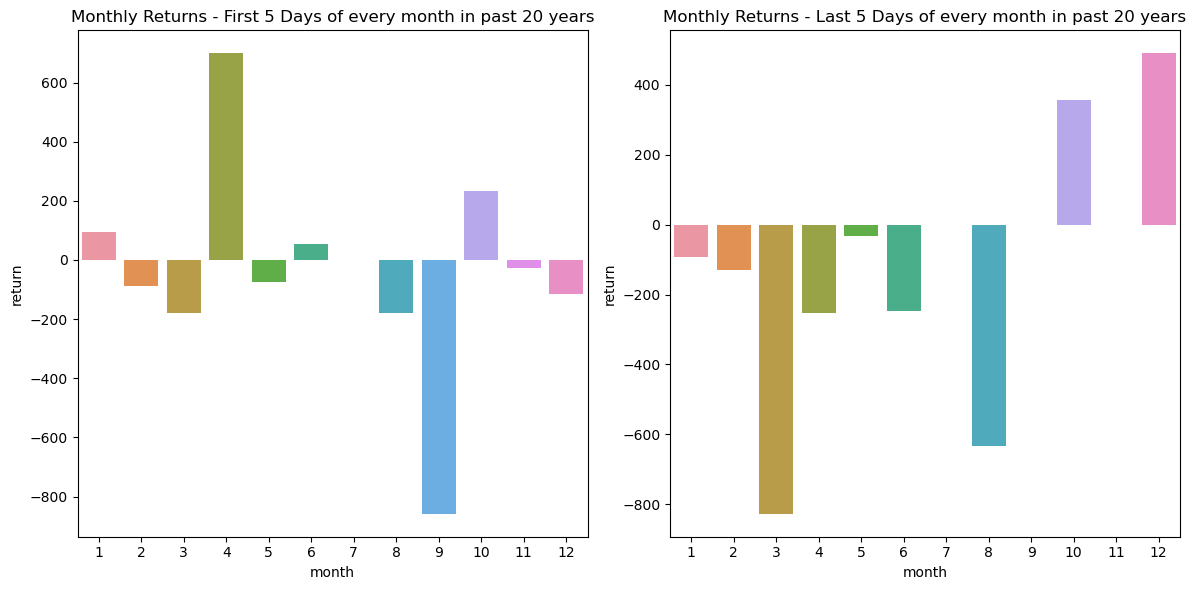

In [29]:
# Monthly Returns:
# This analysis calculates and visualizes the percentage returns for each month and year. It shows how the stock performed during the first 5 days and last 5 days of each month.


# Calculate the monthly returns for the first 5 days of each month and convert them to percentage values.
first_5_days_df['return'] = first_5_days_df['price_change_in_day'].pct_change() * 100  

# Calculate the monthly returns for the last 5 days of each month and convert them to percentage values.
last_5_days_df['return'] = last_5_days_df['price_change_in_day'].pct_change() * 100

# The 'pct_change()' function calculates the percentage change between the current day's price and the previous day's price, and then it's multiplied by 100 to convert the result to a percentage value.

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
# Plot a bar chart to display the monthly returns for the first 5 days of each month.
sns.barplot(x='month', y='return', data=first_5_days_df, ci=None)
plt.title('Monthly Returns - First 5 Days of every month in past 20 years')

plt.subplot(1, 2, 2)
# Plot a bar chart to display the monthly returns for the last 5 days of each month.
sns.barplot(x='month', y='return', data=last_5_days_df, ci=None)
plt.title('Monthly Returns - Last 5 Days of every month in past 20 years')

plt.tight_layout()
plt.show()

# This code calculates and visualizes the monthly returns for the first and last 5 days of every month over the past 20 years using bar charts.

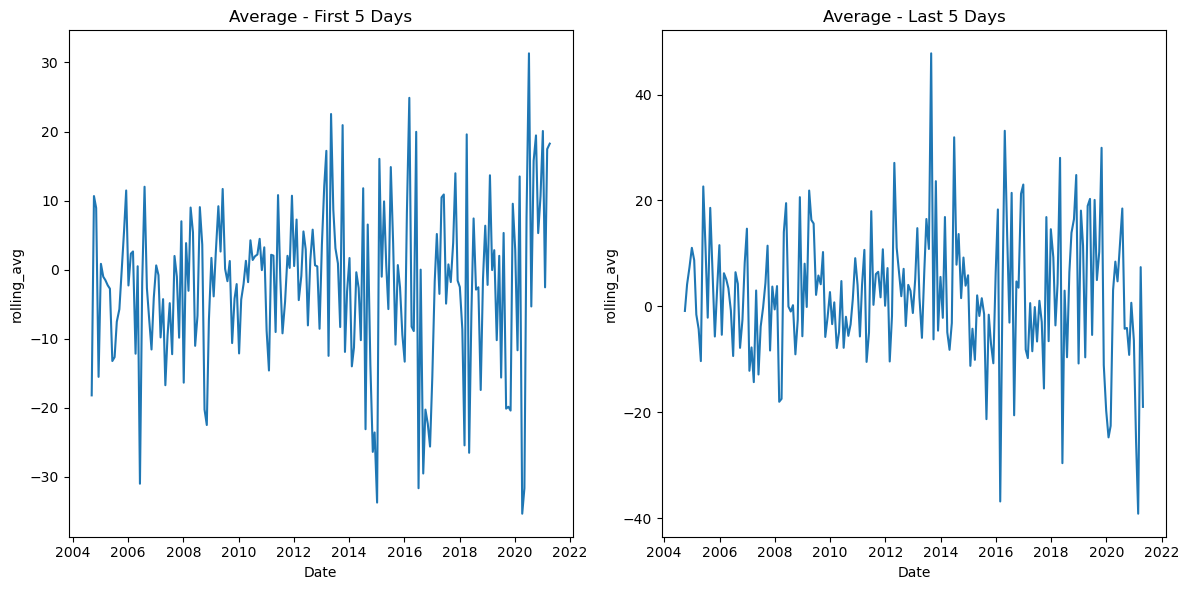

In [30]:
# Rolling averages, also known as moving averages, are a common technique used in trend analysis to smooth out short-term fluctuations in data and highlight underlying trends.

# Upward Trend: If the rolling averages show a consistent increase over time, this indicates a potential upward trend. It suggests that the variable you're analyzing (such as stock prices) is generally increasing during those specific periods of the month.

# Downward Trend: Conversely, if the rolling averages consistently decrease, there might be a downward trend, indicating decreasing values during those specific periods.

# Flat Trend: If the rolling averages show little change, this might suggest a lack of significant trend during those specific periods.

# In this lambda function takes a single argument x, which represents the data in each group. It calculates the rolling average of the data in the group using the .rolling(window=5) method and then applies .mean() to get the average of the rolling values.

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
# Calculate the rolling average for 'price_change_in_day' in the first 5 days of each month (window=5) and store it in 'rolling_avg'.
first_5_days_df['rolling_avg'] = first_5_days_df.groupby(['year', 'month'])['price_change_in_day'].transform(lambda x: x.rolling(window=5).mean())

# Plot a line plot for the rolling average in the first 5 days.
sns.lineplot(x='Date', y='rolling_avg', data=first_5_days_df)
plt.title('Average - First 5 Days')


plt.subplot(1, 2, 2)
# Calculate the rolling average for 'price_change_in_day' in the last 5 days of each month (window=5) and store it in 'rolling_avg'.
last_5_days_df['rolling_avg'] = last_5_days_df.groupby(['year'
                                                        , 'month'])['price_change_in_day'].transform(lambda x: x.rolling(window=5).mean())
# Plot a line plot for the rolling average in the last 5 days.
sns.lineplot(x='Date', y='rolling_avg', data=last_5_days_df)
plt.title('Average - Last 5 Days')

plt.tight_layout()
plt.show()

# This code calculates and visualizes rolling averages for the first and last 5 days of each month, helping identify trends in the data.

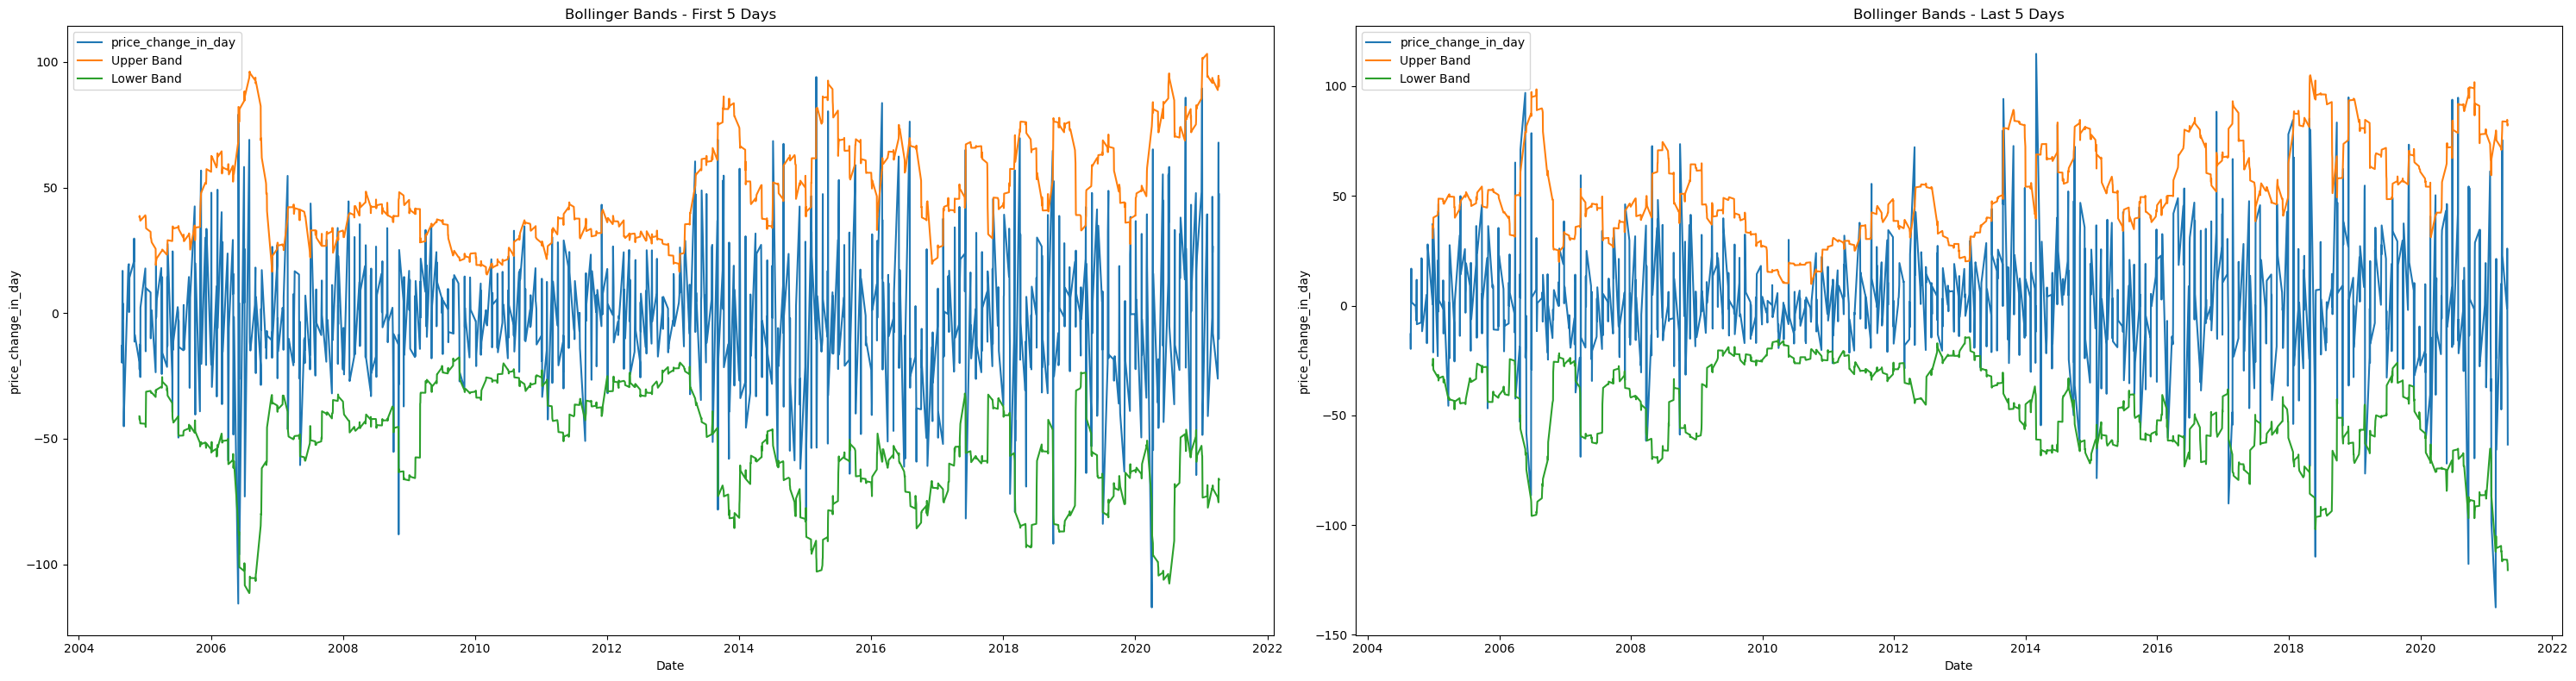

In [31]:
# Bollinger Bands:

# Bollinger Bands are used to assess potential volatility and overbought/oversold levels in financial assets.

# Define a function 'calculate_bollinger_bands' that calculates and adds Bollinger Bands to a DataFrame.
def calculate_bollinger_bands(df):
    df['Rolling_mean'] = df['price_change_in_day'].rolling(window=20).mean()
    df['Rolling_std'] = df['price_change_in_day'].rolling(window=20).std()
    df['Upper_Band'] = df['Rolling_mean'] + (2 * df['Rolling_std'])
    df['Lower_Band'] = df['Rolling_mean'] - (2 * df['Rolling_std'])
    return df

plt.figure(figsize=(30, 8))

plt.subplot(1, 2, 1)

# Calculate Bollinger Bands for the first 5 days of each month and store them in 'first_5_days_df'.
first_5_days_df = calculate_bollinger_bands(first_5_days_df)

# Plot the price change and Bollinger Bands for the first 5 days.
sns.lineplot(x='Date', y='price_change_in_day', data=first_5_days_df, label='price_change_in_day')
sns.lineplot(x='Date', y='Upper_Band', data=first_5_days_df, label='Upper Band')
sns.lineplot(x='Date', y='Lower_Band', data=first_5_days_df, label='Lower Band')
plt.title('Bollinger Bands - First 5 Days')


plt.subplot(1, 2, 2)

# Calculate Bollinger Bands for the last 5 days of each month and store them in 'last_5_days_df'.

# Plot the price change and Bollinger Bands for the last 5 days.
last_5_days_df = calculate_bollinger_bands(last_5_days_df)
sns.lineplot(x='Date', y='price_change_in_day', data=last_5_days_df, label='price_change_in_day')
sns.lineplot(x='Date', y='Upper_Band', data=last_5_days_df, label='Upper Band')
sns.lineplot(x='Date', y='Lower_Band', data=last_5_days_df, label='Lower Band')
plt.title('Bollinger Bands - Last 5 Days')

plt.tight_layout()
plt.show()

# This code calculates and visualizes Bollinger Bands for the first and last 5 days of each month to assess potential volatility and price levels.

## A week before Festival and a week after Festival.

In [32]:
# Diwali dates to analyze
dates_to_analyze = [
    '2000-10-26', '2001-11-14', '2002-11-03', '2003-10-23', '2004-11-11', '2005-11-01', '2006-10-21', '2007-11-09', '2008-10-28', '2009-10-17', '2010-11-05', '2011-10-26','2012-11-13', '2013-11-03', '2014-10-23', '2015-11-11', '2016-10-30', '2017-10-19', '2018-11-07', '2019-10-27', '2020-11-14'
]

# This list contains specific dates associated with the Diwali festival, which can be used for analysis or reference in the dataset.
# If we want to analyse for other festivels then just simply change the dates

In [33]:
days_before = 7
days_after = 7

In [34]:
window_size = 7

before_diwali_dataframes = []
after_diwali_dataframes = []

# These variables specify the time window around each Diwali date for analysis. For each Diwali date, you'll analyze data from 7 days before to 7 days after.

In [35]:
# Separating the data into two sets: one for the week before and one for the week after each Diwali date.

# Iterate through the list of Diwali dates to analyze.
for date_to_analyze in dates_to_analyze:
    date_to_analyze = pd.to_datetime(date_to_analyze)
    

        # Find the index in the 'filtered_df' DataFrame that corresponds to the closest date to the Diwali date.
    analyze_index = filtered_df['Date'].sub(date_to_analyze).abs().idxmin()
    

        # Calculate the start and end indices for the week before and after the Diwali date.
    start_index_before = max(0, analyze_index - window_size)
    end_index_before = analyze_index
    
    start_index_after = analyze_index + 1
    end_index_after = min(analyze_index + window_size + 1, len(filtered_df))
    

        # Slice the 'filtered_df' DataFrame to obtain data for the week before and after Diwali.
    before_data = filtered_df.iloc[start_index_before:end_index_before]
    after_data = filtered_df.iloc[start_index_after:end_index_after]
    

        # Append the DataFrames to their respective lists.
    before_diwali_dataframes.append(before_data)
    after_diwali_dataframes.append(after_data)


    # Concatenate the DataFrames in the 'before_diwali_dataframes' and 'after_diwali_dataframes' lists to obtain the final datasets.
before_df = pd.concat(before_diwali_dataframes)
after_df = pd.concat(after_diwali_dataframes)

# This code separates the data into two sets: one for the week before and one for the week after each Diwali date, allowing for further analysis.

In [36]:
# Reset index for both dataframes.
before_df.reset_index(drop=True, inplace=True)
after_df.reset_index(drop=True, inplace=True)

# This code resets the index for both dataframes, providing a consistent and continuous index for further analysis.

In [37]:
before_df.head(2)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,%Deliverble,day_of_the_week,price_change_in_day,price_change_by_day,Weekly_change,price_diff,movement_type,year,month,day_rank
0,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.3,976.85,979.0,985.65,...,0.2561,Thursday,-13.0,-0.009059,-0.009059,-13.0,1st loss and then gain,2004,8,1.0
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.3,976.85,979.0,985.65,...,0.2561,Thursday,-13.0,-0.009059,-0.009059,-13.0,1st loss and then gain,2004,8,1.0


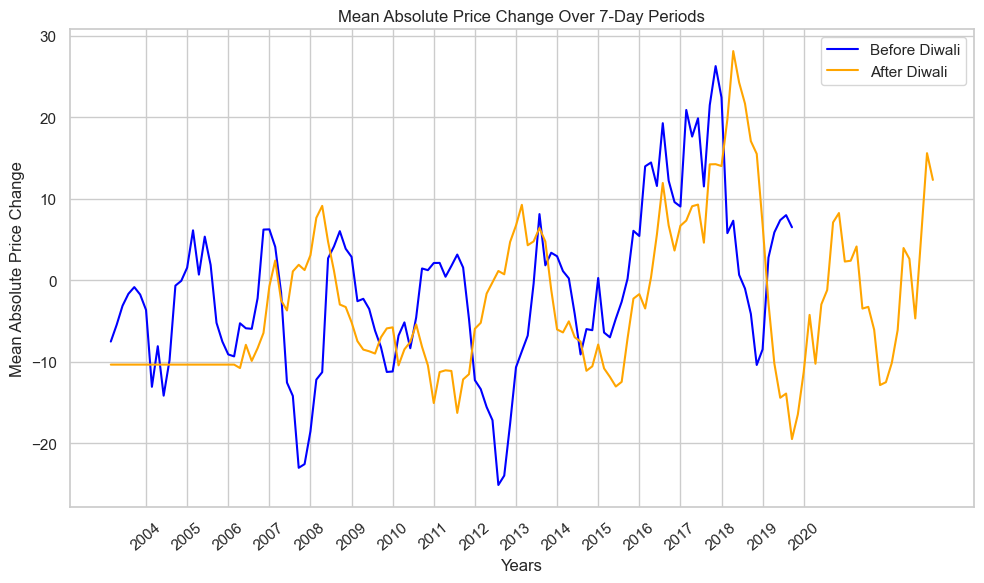

In [38]:
# Analyzing the mean absolute price change over 7-day periods before and after Diwali for each year.

# Define the rolling window size for analysis.
rolling_window_size = 7

# Initialize empty lists to store the analysis results for the 'before_df' and 'after_df'.
before_results = []
after_results = []

# Analyze the mean absolute price change for every 7-day period in the 'before_df' dataframe.
for i in range(len(before_df) - rolling_window_size + 1):
    window_data = before_df.iloc[i : i + rolling_window_size]
    mean_abs_price_change = window_data['price_change_in_day'].mean() 
    before_results.append(mean_abs_price_change)


# Analyze the mean absolute price change for every 7-day period in the 'after_df' dataframe.
for i in range(len(after_df) - rolling_window_size + 1):
    window_data = after_df.iloc[i : i + rolling_window_size]
    mean_abs_price_change = window_data['price_change_in_day'].mean() 
    after_results.append(mean_abs_price_change)

# Create dataframes to store the analysis results.
before_analysis_results = pd.DataFrame({'Mean_Abs_Price_Change': before_results})
after_analysis_results = pd.DataFrame({'Mean_Abs_Price_Change': after_results})

# Set the style and create a plot for visualizing the analysis results.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))


# Obtain the unique years from the 'before_df' dataframe.
years = before_df['year'].unique()

# Plot the mean absolute price change for the 7-day periods before and after Diwali for each year.
plt.plot(before_analysis_results.index, before_analysis_results['Mean_Abs_Price_Change'], label="Before Diwali", color="blue")
plt.plot(after_analysis_results.index, after_analysis_results['Mean_Abs_Price_Change'], label="After Diwali", color="orange")

# Set x-axis ticks and labels to align with years.
plt.xticks(range(rolling_window_size - 1, len(before_df), rolling_window_size), years)  # Set x-axis ticks and labels
plt.xticks(rotation=40)
plt.xlabel("Years")
plt.ylabel("Mean Absolute Price Change")
plt.title("Mean Absolute Price Change Over 7-Day Periods")
plt.legend()
plt.tight_layout()
plt.show()

# This code analyzes and visualizes the mean absolute price change over 7-day periods before and after Diwali for each year, allowing you to observe trends and patterns.